<a href="https://colab.research.google.com/github/MaxVer01/Dataset-projectdataminingHAN/blob/main/KNN_and_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN AND .... MODEL

In this notebook the data 'Asthma Disease Prediction' will be used to work with a KNN model, and a Neural network model.

To make the readability of the notebook more pleasant, it is made to consist of several parts. These parts being:

**Part 1: Data-cleaning**
In this part the data will first be checked for outliers, then the data will be transformed so that the data is more deseriable for the use of the models.
*cursieve tekst*


**Part 2: The KNN-model.**
In this part the KNN-model is used on the data in the hopes of a high accuracy.
*cursieve tekst*


**Part 3: The Neural Network Model.**
*In this part the Neural network-model is used on the data in the hopes of a high accuracy, and to test around with this model in general.*


In [ ]:
#First we import our data-set: Asthma Disease Prediction
import pandas as pd

In [3]:
csv = 'https://raw.githubusercontent.com/MaxVer01/Dataset-projectdataminingHAN/main/processed-data.csv'

In [4]:
df = pd.read_csv(csv)
df.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0


Part 1: Data cleaning: First we check for outliers and missing values

In [5]:
#Identifying possible outliers in the data.
#Severity columns:
# Define a list of expected severity values
expected_severity_values_1 = [1,0]


# Check if any 'Severity' value is different from the expected values
severity_outlier_1 = any(df['Severity_Mild'].isin(expected_severity_values_1) == False)
severity_outlier_2 = any(df['Severity_Moderate'].isin(expected_severity_values_1) == False)
severity_outlier_3 = any(df['Severity_None'].isin(expected_severity_values_1) == False)


if severity_outlier_1:
    print("Severity Mild has an outlier")
else:
    print("Severity Mild has no outlier")

if severity_outlier_2:
    print("Severity Moderate has an outlier")
else:
    print("Severity Moderate has no outlier")

if severity_outlier_3:
    print("Severity None has an outlier")
else:
    print("Severity None has no outlier")


#Identifying possible outliers in the data for the symptoms.

# Making the columns
symptom_columns = ['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'None_Sympton',
                   'Pains', 'Nasal-Congestion', 'Runny-Nose', 'None_Experiencing']

# Define expected values
expected_symptom_values = [0, 1]

# Initialize a flag to check for outliers
symptom_outlier = False

# Loop through the symptom columns and check for outliers
for col in symptom_columns:
    if any(df[col].isin(expected_symptom_values) == False):
        symptom_outlier = True
        break

if symptom_outlier:
    print("Symptoms have an outlier")
else:
    print("Symptoms have no outlier")


## For gender
# Define expected values
Expected_gender_values = [0,1]

# Check if any 'Gender' value is different from the expected values
Gender_outliers_female = any(df['Gender_Female'].isin(Expected_gender_values) == False)
Gender_outliers_male = any(df['Gender_Male'].isin(Expected_gender_values) == False)


if Gender_outliers_female:
    print("Females have an outlier")
else:
    print("Females have no outlier")

# Identify 'Gender' as an outlier if the proportion is significantly different
if Gender_outliers_male:
    print("Males have an outlier")
else:
    print("Males have no outlier")

## For age_groups
# Define a list of expected age group values
expected_age_groups = [0,1]

# Check if any 'Age' value is different from the expected values
Age_outliers_1 = any(df['Age_0-9'].isin(Expected_gender_values) == False)
Age_outliers_2 = any(df['Age_10-19'].isin(Expected_gender_values) == False)
Age_outliers_3 = any(df['Age_20-24'].isin(Expected_gender_values) == False)
Age_outliers_4 = any(df['Age_25-59'].isin(Expected_gender_values) == False)
Age_outliers_5 = any(df['Age_60+'].isin(Expected_gender_values) == False)

if Age_outliers_1:
    print("Age group 1 has an outlier")
else:
    print("Age group 1 has no outlier")

if Age_outliers_2:
    print("Age group 2 has an outlier")
else:
    print("Age group 2 has no outlier")

if Age_outliers_3:
    print("Age group 3 has an outlier")
else:
    print("Age group 3 has no outlier")

if Age_outliers_4:
    print("Age group 4 has an outlier")
else:
    print("Age group 4 has no outlier")

if Age_outliers_5:
    print("Age group 5 has an outlier")
else:
    print("Age group 5 has no outlier")


Severity Mild has no outlier
Severity Moderate has no outlier
Severity None has no outlier
Symptoms have no outlier
Females have no outlier
Males have no outlier
Age group 1 has no outlier
Age group 2 has no outlier
Age group 3 has no outlier
Age group 4 has no outlier
Age group 5 has no outlier


In [6]:
#Checking for missing values

missing_values = df.isna().sum()
# Print the missing values for each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
dtype: int64


Part 2: Data cleaning: Transforming the data

In [7]:
# To simplify working with the dataset we make age-groups and give the gender a speficic number, the number being 1 for male and 2 for female..
# Adding a gender column
df['Gender'] = df['Gender_Male'].apply(lambda x: 1 if x == 1 else 2) #This line makes a new column 'Gender' Gender being 1 if x equals 1 in the Gender_Male column, if not then the gender is 2.

#Addding the gender column
age_columns = ['Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+'] #Making the age_column
age_groups = ['1', '2', '3', '4', '5']                                      #Grouping the ages
df['Age_Group'] = df[age_columns].idxmax(axis=1).apply(lambda x: age_groups[age_columns.index(x)]) #Using idmax to find the maximum value in each group, that being 1 over 0. and then using lambda to bind the age-groups wth the corresponding columns.

# Adding a column for Severity. Severity is classisfied as None, Moderate and Mild. We group them into one column to keep a simple overview.
df['Severity'] = df['Severity_None'] * 0 + df['Severity_Mild'] * 1 + df['Severity_Moderate'] * 2


# Showing df
df.head()



,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,...,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None,Gender,Age_Group,Severity
0,1,1,1,1,0,1,1,1,0,1,...,0,0,0,1,1,0,0,1,1,1
1,1,1,1,1,0,1,1,1,0,1,...,0,0,0,1,1,0,0,1,1,1
2,1,1,1,1,0,1,1,1,0,1,...,0,0,0,1,1,0,0,1,1,1
3,1,1,1,1,0,1,1,1,0,1,...,0,0,0,1,0,1,0,1,1,2
4,1,1,1,1,0,1,1,1,0,1,...,0,0,0,1,0,1,0,1,1,2


In [8]:
# Since the line above creates new columns, for a better overview we now use the function 'drop' from pandas to drop the columns that the new data derivates out of.

# Drop the columns that were used to derive 'Gender' and 'Age_group'
columns_to_drop = ['Gender_Male'] + ['Gender_Female'] + age_columns + ['Severity_None'] + ['Severity_Mild'] + ['Severity_Moderate'] # This adds all the columns previously used, and drops them
df = df.drop(columns=columns_to_drop) #Creates a new df version without the columns.

# To show the resulting DataFrame
df.head()


,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Gender,Age_Group,Severity
0,1,1,1,1,0,1,1,1,0,1,1,1
1,1,1,1,1,0,1,1,1,0,1,1,1
2,1,1,1,1,0,1,1,1,0,1,1,1
3,1,1,1,1,0,1,1,1,0,1,1,2
4,1,1,1,1,0,1,1,1,0,1,1,2


In [9]:
#Checking the value of columns and rows.
df.shape

print(df.Severity.value_counts(normalize = True))

0    0.50
1    0.25
2    0.25
Name: Severity, dtype: float64


Part 2: KNN-model

In [10]:
#Because the models that I will be using like KNN can perhaps work better if I make the severity colum either a yes or no, so 0 and 1 instead of 0-1-2. I will now change this column
df['Severity'] = [1 if value == 2 else value for value in df['Severity']]
#Checking if it worked
print(df.Severity.value_counts(normalize = True))

        Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
0               1          1                        1            1   
1               1          1                        1            1   
2               1          1                        1            1   
3               1          1                        1            1   
4               1          1                        1            1   
...           ...        ...                      ...          ...   
316795          0          0                        0            0   
316796          0          0                        0            0   
316797          0          0                        0            0   
316798          0          0                        0            0   
316799          0          0                        0            0   

        None_Sympton  Pains  Nasal-Congestion  Runny-Nose  None_Experiencing  \
0                  0      1                 1           1                  0   

In [ ]:
# KNN - Model.
# To work with the KNN-model the following is imported:
from sklearn.model_selection import train_test_split #For the KNN
from sklearn.neighbors import KNeighborsClassifier # For the KNN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # For the KNN

# We assign the feature matrix with X and the target variable with Y. For the feature matrix we use all the variables.
X = df[['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose', 'None_Experiencing', 'Gender', 'Age_Group']]
y = df['Severity']

# To make sure that the KNN works we have to split the data intro training en testing sets.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Here a KNeighborsClassifier is created that being 5 and it's trained on the data.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(x_test)



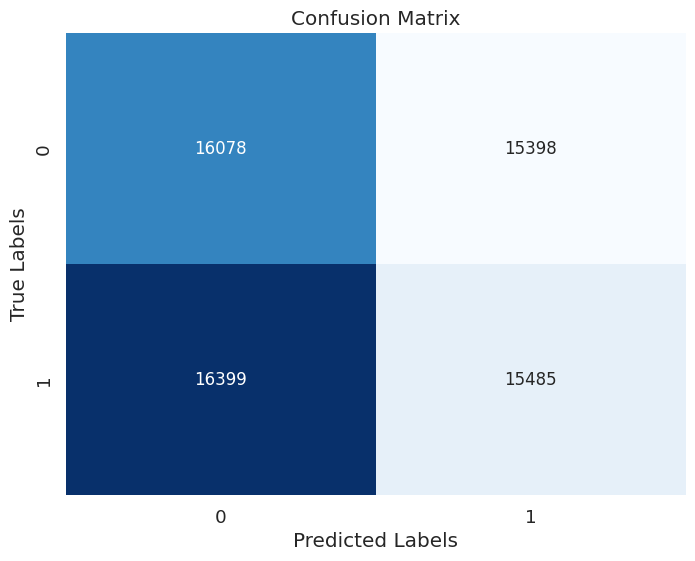

Accuracy: 0.4981534090909091


In [ ]:
# To make a matrix with the KNN made above we import the following:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# The confusion matrix is plotted using Seaborn:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 12}, cbar=False)
plt.xlabel('Predicted Labels') #x-as title
plt.ylabel('True Labels') # y-as title
plt.title('Confusion Matrix') #plot title
plt.show() # Show the plot


print("Accuracy:", accuracy) #Printing the accuracy of the KNN

In [ ]:
#KNN gives an accuracy of 49.82 % given the 5 K

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Standardize your features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Perform hyperparameter tuning
param_grid = {'n_neighbors': range(1, 21)}  # Test k values from 1 to 20
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best k value from the hyperparameter tuning
best_k = grid_search.best_params_['n_neighbors']

# Create a KNeighborsClassifier with the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Best k: {best_k}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

#Since the code takes along time to load the code  results in this:


Best k: 2
Accuracy: 0.49767992424242424
Confusion Matrix:
 [[23807  7669]
 [24158  7726]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.76      0.60     31476
           1       0.50      0.24      0.33     31884

    accuracy                           0.50     63360
   macro avg       0.50      0.50      0.46     63360
weighted avg       0.50      0.50      0.46     63360



In [ ]:
#Since the code takes along time to load the code  results in this:
#Best k: 2
##Accuracy: 49.77%

Part 3: Neural Network - Model

In [17]:
#In the following code I will use the model Neural Network. I'd like to give credits to my classmate Mahmoud Osama, who brought this idea to me, and explained how it works and what it can do.
#Since I do not fully understand the process of this model, the outcome is not deseriable. The possibilities of the model do interest me alot.

import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [11]:
X = df.drop("Severity", axis=1)
y = df["Severity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(X_train.shape[1],)), ## Numbers can be changed
    tf.keras.layers.Dense(3, activation='relu'), # Numbers can be changed
    tf.keras.layers.Dense(1, activation='sigmoid') ## Sigmoid for 0,1 softmax for 0,1,2 (severity values)
])

Epoch 1/5
7920/7920 [==============================] - 21s 3ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6933 - val_accuracy: 0.4968
Epoch 2/5
7920/7920 [==============================] - 22s 3ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5032
Epoch 3/5
7920/7920 [==============================] - 34s 4ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 4/5
7920/7920 [==============================] - 20s 2ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6931 - val_accuracy: 0.4968
Epoch 5/5
7920/7920 [==============================] - 23s 3ms/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 1/5
7920/7920 [==============================] - 22s 3ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.5032
Epoch 2/5
7920/7920 [==============================] - 19s 2ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy:

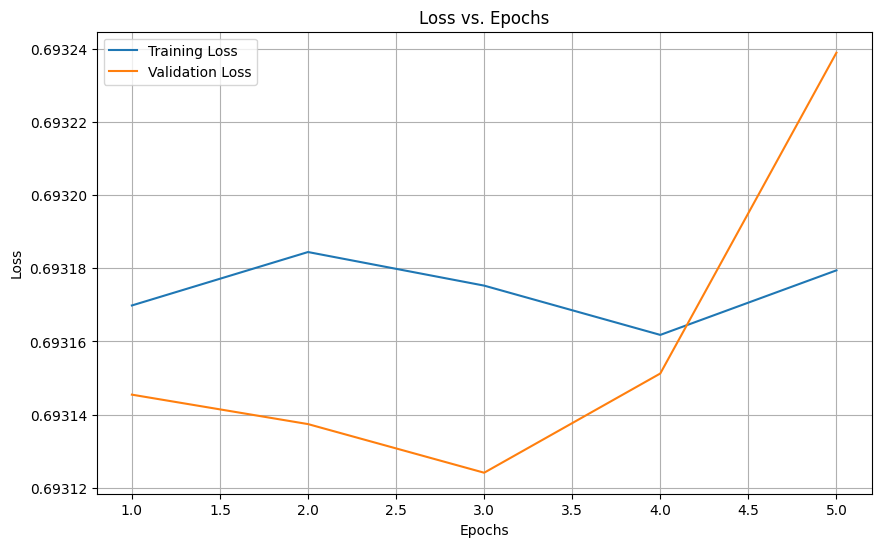

In [18]:
model.compile(optimizer='adam', #Adam looks at where the diverigent is 0, so you find the most optimal point
              loss='binary_crossentropy',
              metrics=['accuracy'])

y_train = y_train.astype('float64')
y_test = y_test.astype('float64')

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Extract the loss values for training and validation data
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a plot of loss vs. epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


1980/1980 [==============================] - 3s 2ms/step - loss: 0.6932 - accuracy: 0.4968
Test Accuracy: 49.68%
